<a href="https://colab.research.google.com/github/noambassat/SupremeCourtClassifier/blob/main/3_4_first_classifier_Train_new_sample_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding + first classifier

In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
import torch
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold,train_test_split,cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from imblearn.under_sampling import RandomUnderSampler


In [31]:
data = pd.read_excel("2_full_data_with_predictions V2.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [32]:
data

,level_0,index,גוף המסמך,מספר הליך,שם הליך,שנת פתיחת ההליך,גוף המסמך חתוך,predicted_probability,prediction_custom_threshold,prediction_original_model,בקשה לרשות ערעור התקבלה?,טקסט שמצביע על תוצאת בקשה שונה (טקסטים שונים מופרדים ב-**),הערעור התקבל?,"רע""פ בקשה אחרת או דלמטה מיוחד",קידוד,קידוד חוזר,הערות תוצאת ערעור,הערות,הערות קידוד חוזר
0,0,5424,"['החלטה בתיק רע""פ 245/04 בבית המשפט העליון רע""...","רע""פ 245/04","רע""פ 245/04 אשר אמר נ. מדינת ישראל",2004,"ט."" 3. המבקש עותר לאפשר לו להביא את עניינולדיו...",0.000160,0,0,נדחה,NaN,NaN,NaN,גל,דניאל,NaN,NaN,NaN
1,1,5425,"['החלטה בתיק רע""פ 11196/04 בבית המשפט העליון ר...","רע""פ 11196/04","רע""פ 11196/04",2004,"['החלטה בתיק רע""פ 11196/04 בבית המשפט העליון ר...",0.024509,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5426,"['החלטה בתיק רע""פ 6526/04 בבית המשפט העליון בש...","רע""פ 6526/04","רע""פ 6526/04 גולנ עמיקמ נ. מדינת ישראל",2004,תי ערכאות – אינן מעוררות שאלה מעיןזו. מנימוק ז...,0.000010,0,0,נדחה,NaN,NaN,NaN,גל,דניאל,NaN,NaN,NaN
3,3,5427,"['החלטה בתיק רע""פ 2444/04 בבית המשפט העליון רע...","רע""פ 2444/04","רע""פ 2444/04 פריד אלקצאצי נ. מדינת ישראל",2004,"כן רע""פ 1174/97 עזרא רפאלי נ\' מדינת ישראל (לא...",0.002376,0,0,נדחה,NaN,NaN,NaN,גל,דניאל,NaN,NaN,NaN
4,4,5428,"['החלטה בתיק רע""פ 2377/04 בבית המשפט העליון בש...","רע""פ 2377/04","רע""פ 2377/04 דני רוזנ נ. היועצ המשפטי לממשלה",2004,"יטב. עניינו של המבקש, אשר נדוןבשתי ערכאות, אינ...",0.003917,0,0,נדחה,NaN,NaN,NaN,גל,דניאל,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,1424,20605,"['החלטה בתיק רע""פ 7505/21 בבית המשפט העליון רע...","רע""פ 7505/21","רע""פ 7505/21 טל גויחמו נ. מדינת ישראל",2021,"סעיף 8 לחוק הפלת""ד חוסם את דרכו של נפגע בתאונת...",0.044445,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1411,1425,20606,"['החלטה בתיק רע""פ 513/21 בבית המשפט העליון רע""...","רע""פ 513/21","רע""פ 513/21 עידנ יהושע נ. מדינת ישראל",2021,וד השופט ג\' קרא המבקש: עידן יהושע נגד המשיבה:...,0.015734,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412,1426,20607,"['החלטה בתיק רע""פ 225/21 בבית המשפט העליון רע""...","רע""פ 225/21","רע""פ 225/21 אלקאר דביר בע""מ נ. מדינת ישראל",2021,על קביעות שבעובדה באשר לאופן שליחת הודעות הקנס...,0.000667,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,1427,20608,"['החלטה בתיק רע""פ 4075/21 בבית המשפט העליון רע...","רע""פ 4075/21","רע""פ 4075/21 דב הרמנ נ. מדינת ישראל",2021,"ו חמור יתר על המידה, אך אינו טוען במפורש כי הו...",0.000381,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data['רע"פ בקשה אחרת או דלמטה מיוחד'].value_counts()
data[(data['רע"פ בקשה אחרת או דלמטה מיוחד'] == 'בקשה אחרת') | (data['רע"פ בקשה אחרת או דלמטה מיוחד'] == 'דלמטה מיוחד')].shape[0]

41

In [34]:
data = data[(data['רע"פ בקשה אחרת או דלמטה מיוחד'] != 'בקשה אחרת') & (data['רע"פ בקשה אחרת או דלמטה מיוחד'] != 'דלמטה מיוחד')]

In [35]:
data = data[(data['בקשה לרשות ערעור התקבלה?'] != 'חלקי') & (data['בקשה לרשות ערעור התקבלה?'] != 'אחר')]

In [36]:
data.dropna(subset=['בקשה לרשות ערעור התקבלה?'],inplace=True)

In [37]:
data['binary_outcome'] = data['בקשה לרשות ערעור התקבלה?'].apply(lambda x: 1 if x == 'התקבל' else 0)

In [38]:
data.shape[0]

158

Confusion Matrix:
[[124   1]
 [ 22  11]]


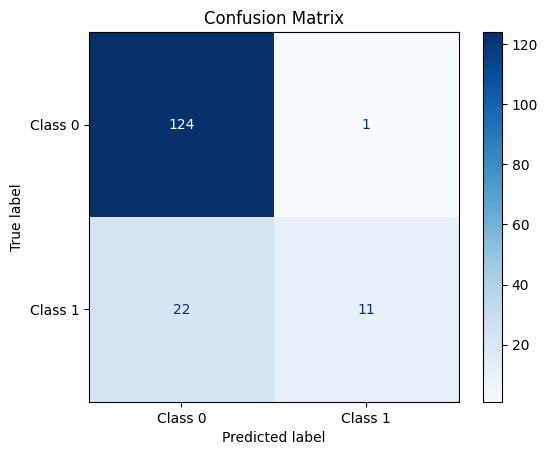

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# יצירת confusion matrix
cm = confusion_matrix(data['binary_outcome'], data['prediction_original_model'])

# הצגת תוצאות confusion matrix
print("Confusion Matrix:")
print(cm)

# ויזואליזציה של confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [40]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
import joblib
import pandas as pd

# טעינת המודל והטוקנייזר
tokenizer = AutoTokenizer.from_pretrained("dean-ai/sentence_transformer_Legal-heBERT")
model = AutoModel.from_pretrained("dean-ai/sentence_transformer_Legal-heBERT")

# פונקציה שמקבלת טקסט ומחזירה את האימבדינג כוקטור
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings[0]




### Embedding

In [ ]:
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_predict, cross_validate
import joblib


# עדכון עמודת המטרה ואימבדינג לאחר חיתוך הטקסטים
y = data["binary_outcome"].values
embeddings = np.array([get_embeddings(text) for text in data["גוף המסמך"]])


### Train and fit

In [ ]:
X = embeddings
# טוען את המודל
classifier = joblib.load("classifier_model_double_trained.pkl")

print("המודל נטען בהצלחה.")

# התאמת המודל לנתונים המאוזנים
classifier.fit(X, y)

# הגדרת מדדים לקרוס ולידציה
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1)
}

# ביצוע Cross Validation
cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

# חיזוי תוויות על כל קפל לצורך קונפיושן מטריקס
y_pred = cross_val_predict(classifier, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)

# הדפסת התוצאות
print("Cross-Validation Accuracy:", cv_results['test_accuracy'])
print("Mean Accuracy:", cv_results['test_accuracy'].mean())
print("Cross-Validation Precision for Class 1:", cv_results['test_precision'])
print("Mean Precision for Class 1:", cv_results['test_precision'].mean())
print("Cross-Validation Recall for Class 1:", cv_results['test_recall'])
print("Mean Recall for Class 1:", cv_results['test_recall'].mean())
print("Cross-Validation F1 Score for Class 1:", cv_results['test_f1'])
print("Mean F1 Score for Class 1:", cv_results['test_f1'].mean())

tn, fp, fn, tp = conf_matrix.ravel()

# הדפסת הקונפיושן מטריקס עם תוויות
print("Confusion Matrix with Labels:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

print("\nConfusion Matrix:")
print(f"[[{tn} {fp}]")
print(f" [{fn} {tp}]]")


# --- שמירת משאבים ---
joblib.dump(classifier, '2_classifier_model_double_trained.pkl')

print("המודל והמשאבים נשמרו בהצלחה.")


In [ ]:
# # חיזוי הסתברויות לכל קפל לצורך שינוי סף
# y_prob = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')[:, 1]

# # קביעת סף חדש
# threshold = 0.1
# y_pred = (y_prob >= threshold).astype(int)

# # יצירת קונפיושן מטריקס
# conf_matrix = confusion_matrix(y, y_pred)
# # חישוב מדדים עם הסף החדש
# accuracy = accuracy_score(y, y_pred)
# precision = precision_score(y, y_pred, pos_label=1)
# recall = recall_score(y, y_pred, pos_label=1)
# f1 = f1_score(y, y_pred, pos_label=1)

# print("\nמדדים לאחר שינוי סף הסיווג:")
# print(f"Accuracy: {accuracy:.3f}")
# print(f"Precision for Class 1: {precision:.3f}")
# print(f"Recall for Class 1: {recall:.3f}")
# print(f"F1 Score for Class 1: {f1:.3f}")

# # # הדפסת התוצאות
# # print("Cross-Validation Accuracy:", cv_results['test_accuracy'])
# # print("Mean Accuracy:", cv_results['test_accuracy'].mean())
# # print("Cross-Validation Precision for Class 1:", cv_results['test_precision'])
# # print("Mean Precision for Class 1:", cv_results['test_precision'].mean())
# # print("Cross-Validation Recall for Class 1:", cv_results['test_recall'])
# # print("Mean Recall for Class 1:", cv_results['test_recall'].mean())
# # print("Cross-Validation F1 Score for Class 1:", cv_results['test_f1'])
# # print("Mean F1 Score for Class 1:", cv_results['test_f1'].mean())

# tn, fp, fn, tp = conf_matrix.ravel()

# # הדפסת הקונפיושן מטריקס עם תוויות
# print("Confusion Matrix with Labels:")
# print(f"True Negatives (TN): {tn}")
# print(f"False Positives (FP): {fp}")
# print(f"False Negatives (FN): {fn}")
# print(f"True Positives (TP): {tp}")

# print("\nConfusion Matrix:")
# print(f"[[{tn} {fp}]")
# print(f" [{fn} {tp}]]")

# # --- שמירת משאבים ---
# # joblib.dump(classifier, '2_classifier_model_double_trained.pkl')

# # print("המודל והמשאבים נשמרו בהצלחה.")

### FN print


In [ ]:

# איתור האינדקסים של FN - תווית אמיתית היא 1 והתחזית היא 0
fn_indices = np.where((y == 1) & (y_pred == 0))[0]


# קריאת השורות הרלוונטיות מה-DataFrame
false_negative_rows = data.iloc[fn_indices]

# ווידוא סינכרון מוחלט של האינדקסים
if len(false_negative_rows) != len(fn_indices):
    raise ValueError("Mismatch between FN rows and FN indices!")

# הדפסת פסקי הדין של FN בצורה מפורמטת עם הערכים המקוריים והתחזית להשוואה
print("False Negative Cases (True Label: 1, Predicted Label: 0):")
print("=" * 80)

for i, (index, row) in enumerate(false_negative_rows.iterrows(), 1):
    print(f"\nCase {i}:")
    print("-" * 80)
    print("Index in Original Data:")
    print(index)

    # הדפסת binary_outcome (תווית אמיתית)
    print("\nBinary Outcome (True Label):")
    print(row["binary_outcome"])

    # הדפסת התחזית (Predicted Label)
    print("\nPredicted Label:")
    print(0)  # FN משמעותו שהתחזית היא 0

    # הדפסת גוף המסמך אם קיים
    if "גוף המסמך" in row:
        print("\nDocument Body:")
        formatted_text = "\n".join(row["גוף המסמך"][j:j + 80] for j in range(0, len(row["גוף המסמך"]), 80))
        print(formatted_text)
    else:
        print("\nDocument Body: Not Available")

    # הדפסת גוף המסמך חתוך אם קיים
    if "גוף המסמך חתוך" in row:
        print("\nDocument Body (Trimmed):")
        formatted_text_trimmed = "\n".join(row["גוף המסמך חתוך"][j:j + 80] for j in range(0, len(row["גוף המסמך חתוך"]), 80))
        print(formatted_text_trimmed)
    else:
        print("\nDocument Body (Trimmed): Not Available")

    # הדפסת שאר העמודות הרלוונטיות
    relevant_columns = [
        "בקשה לרשות ערעור התקבלה?", "טקסט שמצביע על תוצאת בקשה שונה",
        "הערעור התקבל?", "רע\"פ בקשה אחרת או דלמטה מיוחד",
        "קידוד", "קידוד חוזר", "הערות", "הערות קידוד חוזר"
    ]
    print("\nRelevant Columns Data:")
    for col in relevant_columns:
        if col in row:
            print(f"{col}: {row[col]}")
        else:
            print(f"{col}: Not Available")

    print("-" * 80)

print("=" * 80)


In [ ]:
# חיזוי תוויות על כל קפל לצורך זיהוי FP
y_pred = cross_val_predict(classifier, X, y, cv=5)

# איתור האינדקסים של FP - תווית אמיתית היא 0 והתחזית היא 1
fp_indices = np.where((y == 0) & (y_pred == 1))[0]


# קריאת השורות הרלוונטיות מה-DataFrame
false_positive_rows = data.iloc[fp_indices]

# ווידוא סינכרון מוחלט של האינדקסים
if len(false_positive_rows) != len(fp_indices):
    raise ValueError("Mismatch between FP rows and FP indices!")

# הדפסת פסקי הדין של FP בצורה מפורמטת עם הערכים המקוריים והתחזית להשוואה
print("False Positive Cases (True Label: 0, Predicted Label: 1):")
print("=" * 80)

for i, (index, row) in enumerate(false_positive_rows.iterrows(), 1):
    print(f"\nCase {i}:")
    print("-" * 80)
    print("Index in Original Data:")
    print(index)

    # הדפסת binary_outcome (תווית אמיתית)
    print("\nBinary Outcome (True Label):")
    print(row["binary_outcome"])

    # הדפסת התחזית (Predicted Label)
    print("\nPredicted Label:")
    print(1)  # FP משמעותו שהתחזית היא 1

    # הדפסת גוף המסמך אם קיים
    if "גוף המסמך" in row:
        print("\nDocument Body:")
        formatted_text = "\n".join(row["גוף המסמך"][j:j + 80] for j in range(0, len(row["גוף המסמך"]), 80))
        print(formatted_text)
    else:
        print("\nDocument Body: Not Available")

    # הדפסת גוף המסמך חתוך אם קיים
    if "גוף המסמך חתוך" in row:
        print("\nDocument Body (Trimmed):")
        formatted_text_trimmed = "\n".join(row["גוף המסמך חתוך"][j:j + 80] for j in range(0, len(row["גוף המסמך חתוך"]), 80))
        print(formatted_text_trimmed)
    else:
        print("\nDocument Body (Trimmed): Not Available")

    # הדפסת שאר העמודות הרלוונטיות
    relevant_columns = [
        "בקשה לרשות ערעור התקבלה?", "טקסט שמצביע על תוצאת בקשה שונה",
        "הערעור התקבל?", "רע\"פ בקשה אחרת או דלמטה מיוחד",
        "קידוד", "קידוד חוזר", "הערות", "הערות קידוד חוזר"
    ]
    print("\nRelevant Columns Data:")
    for col in relevant_columns:
        if col in row:
            print(f"{col}: {row[col]}")
        else:
            print(f"{col}: Not Available")

    print("-" * 80)

print("=" * 80)


Undersampling

In [ ]:

# # הגדרת undersampler עם יחס של60-40 לטובת קלאס 0
# undersampler = RandomUnderSampler(sampling_strategy=0.6, random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(embeddings, y)

# # שמירת אינדקסים מקוריים
# resampled_indices = undersampler.sample_indices_
# joblib.dump(resampled_indices, 'resampled_indices.pkl')

# # ווידוא התאמה: מיפוי y_resampled לעמודת binary_outcome
# binary_outcome_resampled = data.iloc[resampled_indices]["binary_outcome"].values
# if not np.array_equal(y_resampled, binary_outcome_resampled):
#     raise ValueError("Mismatch between y_resampled and resampled binary_outcome values!")

# # הגדרת מסווג לוגיסטי עם משקל של 3 עבור קלאס 1
# classifier = joblib.load("classifier_model.pkl")

# # התאמת המודל לנתונים המאוזנים
# classifier.fit(X_resampled, y_resampled)

# # הגדרת מדדים לקרוס ולידציה
# scoring = {
#     'accuracy': make_scorer(accuracy_score),
#     'precision': make_scorer(precision_score, pos_label=1),
#     'recall': make_scorer(recall_score, pos_label=1),
#     'f1': make_scorer(f1_score, pos_label=1)
# }

# # ביצוע Cross Validation
# cv_results = cross_validate(classifier, X_resampled, y_resampled, cv=5, scoring=scoring)

# # חיזוי תוויות על כל קפל לצורך קונפיושן מטריקס
# y_pred = cross_val_predict(classifier, X_resampled, y_resampled, cv=5)
# conf_matrix = confusion_matrix(y_resampled, y_pred)

# # הדפסת התוצאות
# print("Cross-Validation Accuracy:", cv_results['test_accuracy'])
# print("Mean Accuracy:", cv_results['test_accuracy'].mean())
# print("Cross-Validation Precision for Class 1:", cv_results['test_precision'])
# print("Mean Precision for Class 1:", cv_results['test_precision'].mean())
# print("Cross-Validation Recall for Class 1:", cv_results['test_recall'])
# print("Mean Recall for Class 1:", cv_results['test_recall'].mean())
# print("Cross-Validation F1 Score for Class 1:", cv_results['test_f1'])
# print("Mean F1 Score for Class 1:", cv_results['test_f1'].mean())

# tn, fp, fn, tp = conf_matrix.ravel()

# # הדפסת הקונפיושן מטריקס עם תוויות
# print("Confusion Matrix with Labels:")
# print(f"True Negatives (TN): {tn}")
# print(f"False Positives (FP): {fp}")
# print(f"False Negatives (FN): {fn}")
# print(f"True Positives (TP): {tp}")

# print("\nConfusion Matrix:")
# print(f"[[{tn} {fp}]")
# print(f" [{fn} {tp}]]")

# # --- לוגיקה למציאת threshold אופטימלי ---
# predicted_probabilities = classifier.predict_proba(X_resampled)[:, 1]
# precision, recall, thresholds = precision_recall_curve(y_resampled, predicted_probabilities)
# f1_scores = 2 * (precision * recall) / (precision + recall)
# optimal_threshold = thresholds[np.argmax(f1_scores)]
# print(f"Threshold אופטימלי לפי F1 Score: {optimal_threshold}")

# # שמירת יחס הכיתות המקורי
# class_ratio_original = sum(y == 1) / len(y)
# print(f"יחס כיתות מקורי (Class 1): {class_ratio_original:.2f}")

# # --- שמירת משאבים ---
# joblib.dump(classifier, '2_classifier_model_second_undersampled.pkl')
# joblib.dump(optimal_threshold, 'optimal_threshold.pkl')
# joblib.dump(class_ratio_original, 'class_ratio_original.pkl')

# print("המודל והמשאבים נשמרו בהצלחה.")


In [ ]:
# # חיזוי הסתברויות לכל קפל לצורך שינוי סף
# y_prob = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')[:, 1]

# # קביעת סף חדש
# threshold = 0.1
# y_pred = (y_prob >= threshold).astype(int)

# # יצירת קונפיושן מטריקס
# conf_matrix = confusion_matrix(y, y_pred)
# # חישוב מדדים עם הסף החדש
# accuracy = accuracy_score(y, y_pred)
# precision = precision_score(y, y_pred, pos_label=1)
# recall = recall_score(y, y_pred, pos_label=1)
# f1 = f1_score(y, y_pred, pos_label=1)

# print("\nמדדים לאחר שינוי סף הסיווג:")
# print(f"Accuracy: {accuracy:.3f}")
# print(f"Precision for Class 1: {precision:.3f}")
# print(f"Recall for Class 1: {recall:.3f}")
# print(f"F1 Score for Class 1: {f1:.3f}")

# # # הדפסת התוצאות
# # print("Cross-Validation Accuracy:", cv_results['test_accuracy'])
# # print("Mean Accuracy:", cv_results['test_accuracy'].mean())
# # print("Cross-Validation Precision for Class 1:", cv_results['test_precision'])
# # print("Mean Precision for Class 1:", cv_results['test_precision'].mean())
# # print("Cross-Validation Recall for Class 1:", cv_results['test_recall'])
# # print("Mean Recall for Class 1:", cv_results['test_recall'].mean())
# # print("Cross-Validation F1 Score for Class 1:", cv_results['test_f1'])
# # print("Mean F1 Score for Class 1:", cv_results['test_f1'].mean())

# tn, fp, fn, tp = conf_matrix.ravel()

# # הדפסת הקונפיושן מטריקס עם תוויות
# print("Confusion Matrix with Labels:")
# print(f"True Negatives (TN): {tn}")
# print(f"False Positives (FP): {fp}")
# print(f"False Negatives (FN): {fn}")
# print(f"True Positives (TP): {tp}")

# print("\nConfusion Matrix:")
# print(f"[[{tn} {fp}]")
# print(f" [{fn} {tp}]]")

# # --- שמירת משאבים ---
# joblib.dump(classifier, '2_classifier_model_second_undersampled.pkl')

# print("המודל והמשאבים נשמרו בהצלחה.")